In [1]:
import sys
import os
import numpy as np                                # numpy is a collection of python modules for array math.
from matplotlib import pyplot as plt              # A collection of modules. Needed here to display images and graphs.
from matplotlib import pylab                      # A collection of modules. Needed here to plot histograms.
sys.path.append('/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/a212pylibs') # Adds the path to the DataPype module to the system path.
from datapype.datafits import DataFits            # Gets the function that makes datapype io objects from module datafits in package datapype.
from astropy.io import fits                       # Need this if you want to use astropy.io io objects.
from ipywidgets import interact                   # Need this for interactive plots.
from matplotlib.colors import LogNorm             # Machinery for LogNorm scaling of intensities.
from matplotlib.colors import SymLogNorm          # Machinery for SymLogNorm scaling of intensities.
from matplotlib.colors import PowerNorm           # Machinery for LogNorm (e.g., square root) scaling of intensities.
from astropy.stats import mad_std                 # The median absolute deviation, a more robust estimator than std.
import scipy.ndimage as nd                        # Various algorithms for image transformations.


# ## Use this if dah_functions is a subdirectory of a212pylibs.
# from dah_functions.dah_functions import head
# from dah_functions.dah_functions import displaypic
# from dah_functions.dah_functions import displaypic2
# from dah_functions.dah_functions import show_image
# from dah_functions.dah_functions import blink_images
# from dah_functions.dah_functions import blink2images
# from dah_functions.dah_functions import rowplot
# from dah_functions.dah_functions import colplot
# from dah_functions.dah_functions import rowcolplot

## Use this if dah_functions is stored in a different path from a212pylibs.
## The following adds a bunch of functions in a module stored in the path below.
sys.path.append('/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/a212pylibs/dah_functions') # Adds path to MyCode directory on my computer to system python path.
from dah_functions_2 import head
from dah_functions_2 import displaypic
from dah_functions_2 import displaypic2
from dah_functions_2 import show_image
from dah_functions_2 import blink_images
from dah_functions_2 import rowplot
from dah_functions_2 import colplot
from dah_functions_2 import rowcolplot
from dah_functions_2 import moments
from dah_functions_2 import quickpic
from dah_functions_2 import getpatch
from dah_functions_2 import stackfits

###############################################################################
# ## Don't need the following in this notebook. Hold on to them for now.
# import time        
# import re
# import scipy.stats
# import matplotlib.colors as colors
# import configobj  #What is this? Where does it come from?
###############################################################################

In [2]:
len(get_ipython().user_ns.keys())

48

In [3]:
datapath = '/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/24inch_data/190429/dark'

In [4]:
whichpath = datapath

## For ALL the files in the directory.
allfiles = [f for f in os.listdir(datapath)]

allfiles = sorted(allfiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(allfiles)):
    print( i, allfiles[i])

0 dark_190429_AA-026_180s.fit
1 dark_190429_AA-027_180s.fit
2 dark_190429_AA-030_bias.fit
3 dark_190429_AA-031_bias.fit
4 dark_190429_AA-046_bias.fit
5 dark_190429_AA-047_bias.fit
6 dark_190429_AA-078_bias.fit
7 dark_190429_AA-079_bias.fit
8 dark_190429_AB-001_bias.fit
9 dark_190429_AB-016_180s.fit
10 dark_190429_AB-017_180s.fit
11 dark_190429_AB-048_bias.fit
12 dark_190429_AB-049_bias.fit
13 dark_190429_AB-060_180s.fit
14 dark_190429_AB-061_180s.fit
15 dark_190429_AB-076_bias.fit
16 dark_190429_AB-084_180s.fit
17 dark_190429_AB-085_180s.fit
18 dark_190429_AB-092_bias.fit
19 dark_190429_AB-093_bias.fit


In [5]:
whichpath = datapath

somefiles = [f for f in os.listdir(whichpath) if '.fit' in f and '_bias' in f and 'AA' in f and 'stack' not in f]

somefiles = sorted(somefiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(somefiles)):
    print( i, somefiles[i])



0 dark_190429_AA-030_bias.fit
1 dark_190429_AA-031_bias.fit
2 dark_190429_AA-046_bias.fit
3 dark_190429_AA-047_bias.fit
4 dark_190429_AA-078_bias.fit
5 dark_190429_AA-079_bias.fit


In [6]:
acceptlist = True             # True if you want to accept all the files in somefiles.
contiguous = True             # True if you want to accept a contiguous subset of somefiles.
startfile, endfile = 5,9      # The first and last files in a contiquous subset.
flist = [0,3,4,5,6,7,8]        # An explicit list of the files you want to accept.

if acceptlist == True:
    files = somefiles
    for i in range(len(files)):
        print(i, files[i])
else:
    if contiguous == True:
        files = somefiles[startfile:endfile+1]
        for i in range(len(files)):
            print( i, files[i])
    else:
        files = []
        for i in range(len(flist)):
            files.append(somefiles[flist[i]])
        for i in range(len(files)):
            print( i, flist[i], files[i])

0 dark_190429_AA-030_bias.fit
1 dark_190429_AA-031_bias.fit
2 dark_190429_AA-046_bias.fit
3 dark_190429_AA-047_bias.fit
4 dark_190429_AA-078_bias.fit
5 dark_190429_AA-079_bias.fit


In [7]:
## Make a stack of images.
image, headlist, rows, cols, imedian, imad = stackfits(datapath,files)

GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration


rows = 1024    cols = 1024
image.shape = (6, 1024, 1024)

0 dark_190429_AA-030_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



1 dark_190429_AA-031_bias.fit

2 dark_190429_AA-046_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



3 dark_190429_AA-047_bias.fit

4 dark_190429_AA-078_bias.fit

5 dark_190429_AA-079_bias.fit


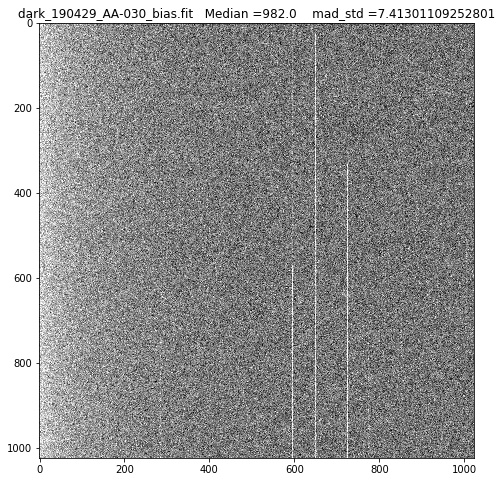

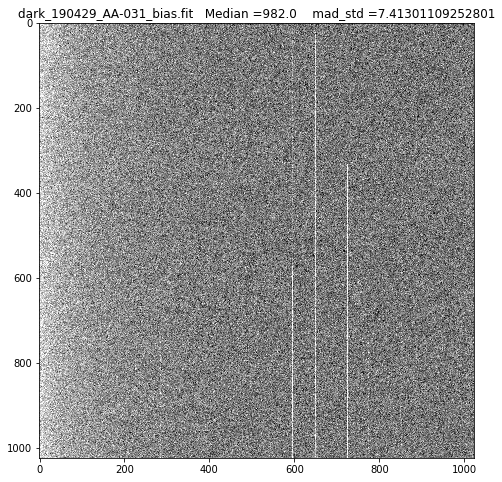

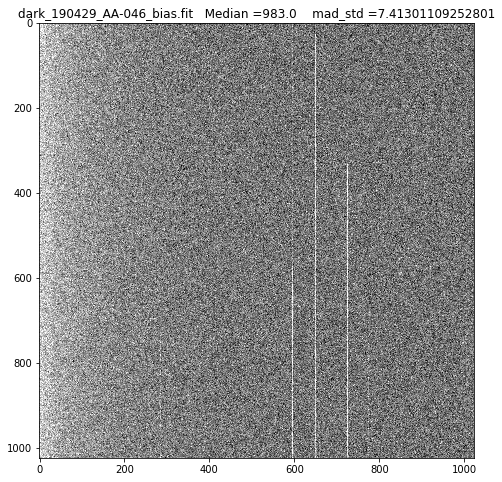

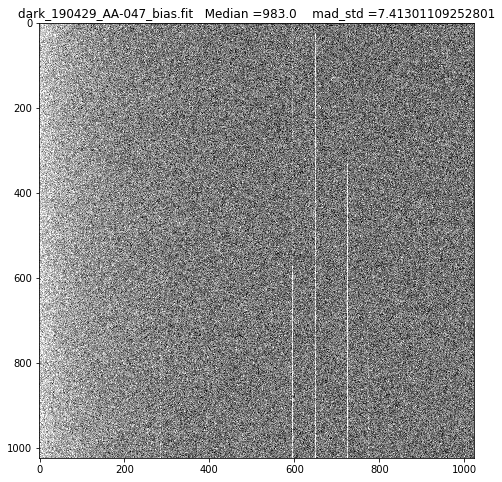

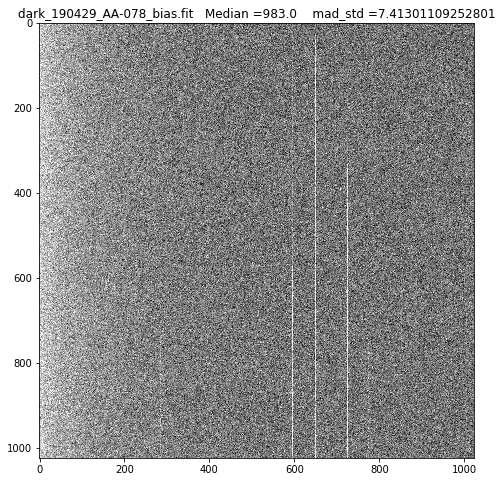

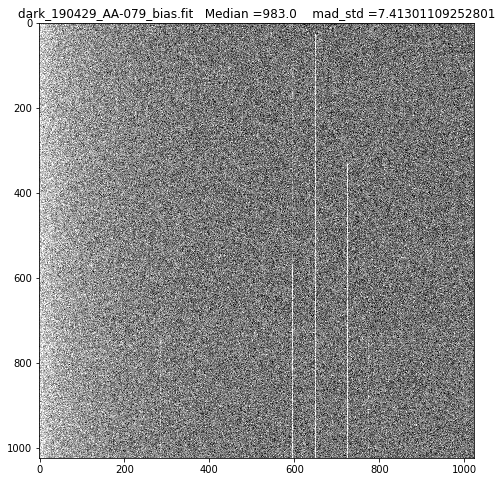

In [10]:
## view stack

# # # Display all the images in the stack.
# # figx, figy = 20,20   # Use these to reveal fine detail in images.
figx, figy = 8,8   # Use these to get a quick look and save space.

for i in range(len(files)):
     plt.figure(figsize = (figx,figy))
     vmx= imedian[i] + imad[i] * 3.0
     vmn = imedian[i] - imad[i] * 3.0
#      grid()
     plt.title(files[i] + '   Median =' + str(imedian[i]) + '    mad_std =' + str(imad[i]))
     plt.imshow(image[i],'gray',interpolation = 'nearest',vmax=vmx,vmin=vmn)

In [12]:
stackarray = image

In [13]:
stackarray_std = np.std(image, axis=0)

img_global_std = np.median(stackarray_std)

bad_pixels = stackarray_std > img_global_std*1.7

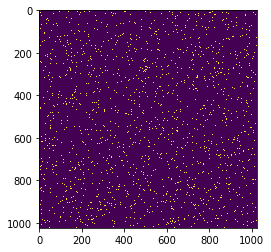

In [15]:
plt.imshow(bad_pixels)

#locs = np.array(np.where(bad_pixels == True))

#for i in range(locs.shape[1]):
  #  print(locs[0,i],locs[1,i])

In [16]:
## Make a True/False Array

print(bad_pixels)


[[False False False ... False False False]
 [False False False ... False  True False]
 [ True False False ... False False  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
